### Student Information
Name: 李庭競

Student ID: 111033626

GitHub ID: CrazyRyan0812

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# 1 Take Home Exercise

In [1]:
# This is copied from -Master.ipynb, to complete the take home exercise

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])


In [2]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [4]:
# I will demostrate querying data via where function
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-where-method-and-masking
X2 = X.copy()
X2.loc[:, 'category']
X2.where(X2.loc[:, 'category']>2)
# You can see there are only category's value which are larger than 2 will be remained, but the structure is also remained.

,text,category,category_name
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3.0,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3.0,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3.0,soc.religion.christian
...,...,...,...
2252,NaN,NaN,NaN
2253,NaN,NaN,NaN
2254,NaN,NaN,NaN
2255,NaN,NaN,NaN


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

It seems that this checkbox do not need to compile any code.

for A and B, they are all the same thing of np.nan. (A is we assign it, B is empty and NA_dict is a numpy array such that the empty is also np.nan)

for C and D, they are all signed by 'value', that is to say, they have something. Therefore, in case 1 they show their value is NaN and None, in case 2 they show that they are not null.

for E, it is signed None in python's code, so it will also be recognized as null.

for F, it is assigned nothing in text but in memory, so in case 1 it show '', in case 2 it has value. Therefore, it is not null.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000) #random state
X_sample

,text,category,category_name
1752,From: eric.vitiello@tfd.coplex.com (Eric Vitie...,1,comp.graphics
238,Subject: Origin of Morphine From: chinsz@eis.c...,2,sci.med
140,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
1654,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
406,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
...,...,...,...
1052,From: bassili@cs.arizona.edu (Amgad Z. Bassili...,3,soc.religion.christian
1716,From: calzone@athena.mit.edu Subject: Re: Eume...,2,sci.med
839,"From: kjiv@lrc.edu Subject: Hismanal, et. al.-...",2,sci.med
989,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian


In [8]:
X.groupby("category").count()

,text,category_name
category,,
0,480,480
1,584,584
2,594,594
3,599,599


In [9]:
X_sample.groupby("category").count()

,text,category_name
category,,
0,211,211
1,255,255
2,293,293
3,241,241


There is NO change in X dataframe. However, X_sample has several different changes below.

1. The index value in column[0] becomes random.
2. The size is smaller than original; nevertheless, if we change n to a nummer which is bigger than original suze and set replace=true, it can be implemented.
3. The distribution for category is different from original.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

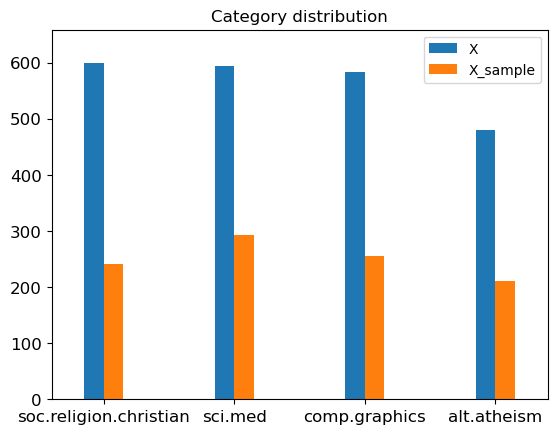

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(X.category_name.value_counts()) * 1.1
np.random.seed(42)

combine = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
combine.columns = ["X", "X_sample"]
combine.plot(kind="bar",title = 'Category distribution',ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, width=0.3)
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryanl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts[0])

analyze = count_vect.build_analyzer()
analyze(X.text[0])
X_counts.shape
count_vect.get_feature_names_out()[0:10]
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [13]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [14]:
# Answer here
line5=X_counts[4:5, 0:100].toarray()
position=np.where(line5==1)
print(position[0:])
count_vect.get_feature_names_out()[position[1][1]:position[1][1]+1]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


array(['01'], dtype=object)

We find the another index of value '01' is 37

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

[[ 122    1]
 [ 399    1]
 [ 572    1]
 [ 762    1]
 [1055    0]
 [1400    1]
 [1584    1]
 [1664    0]
 [1664   34]
 [1664   36]
 [1943   37]
 [2169    1]]


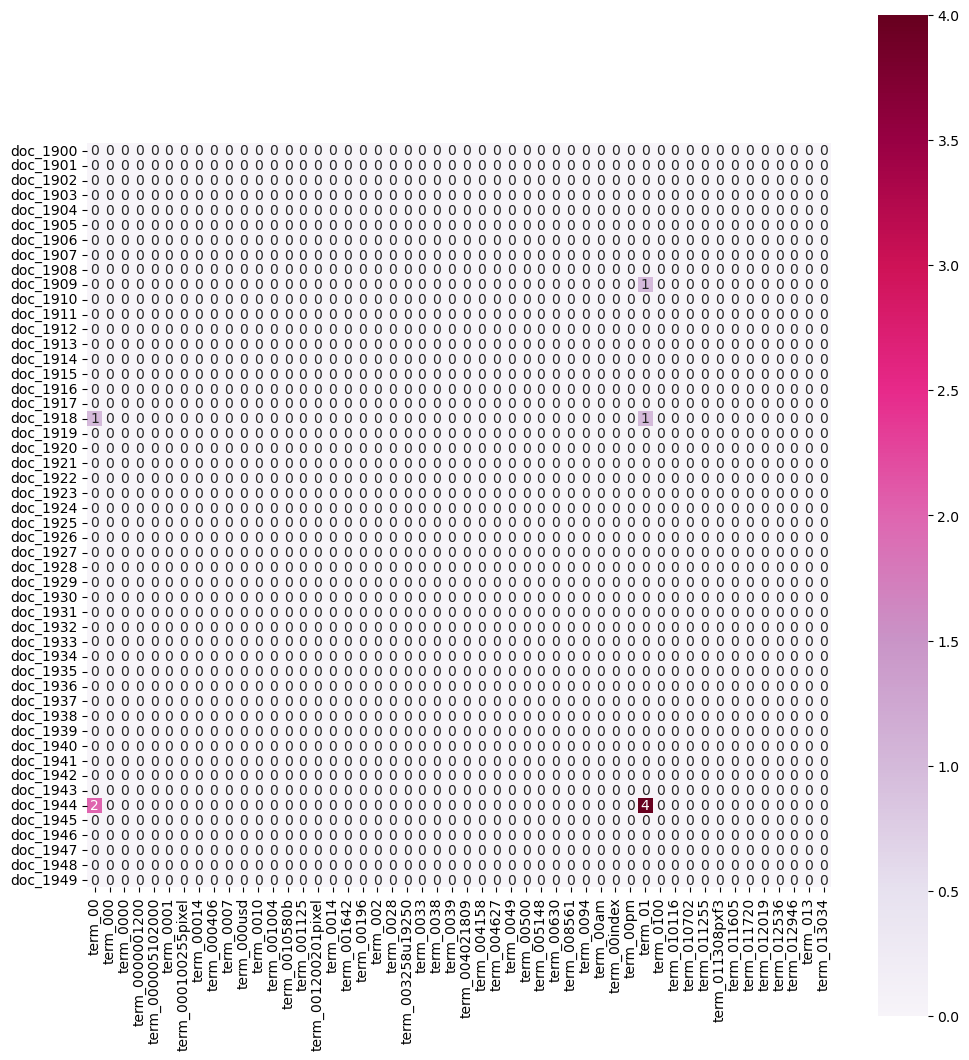

In [15]:
# Answer here
# below is to find the index whose frequency is larger than 3 by using np.argwhere
solutions = np.argwhere(X_counts[1:2257,0:100] > 3)
print(solutions)
# I choose 1943 to represent it, and specific the range to 1900-1950, and only select 50 terms to represent the heatmap
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[1900:1950]]
plot_z = X_counts[1900:1950, 0:50].toarray()
plt.subplots(figsize=(12, 13))
ax = sns.heatmap(pd.DataFrame(plot_z, columns = plot_x, index = plot_y),
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True, square=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

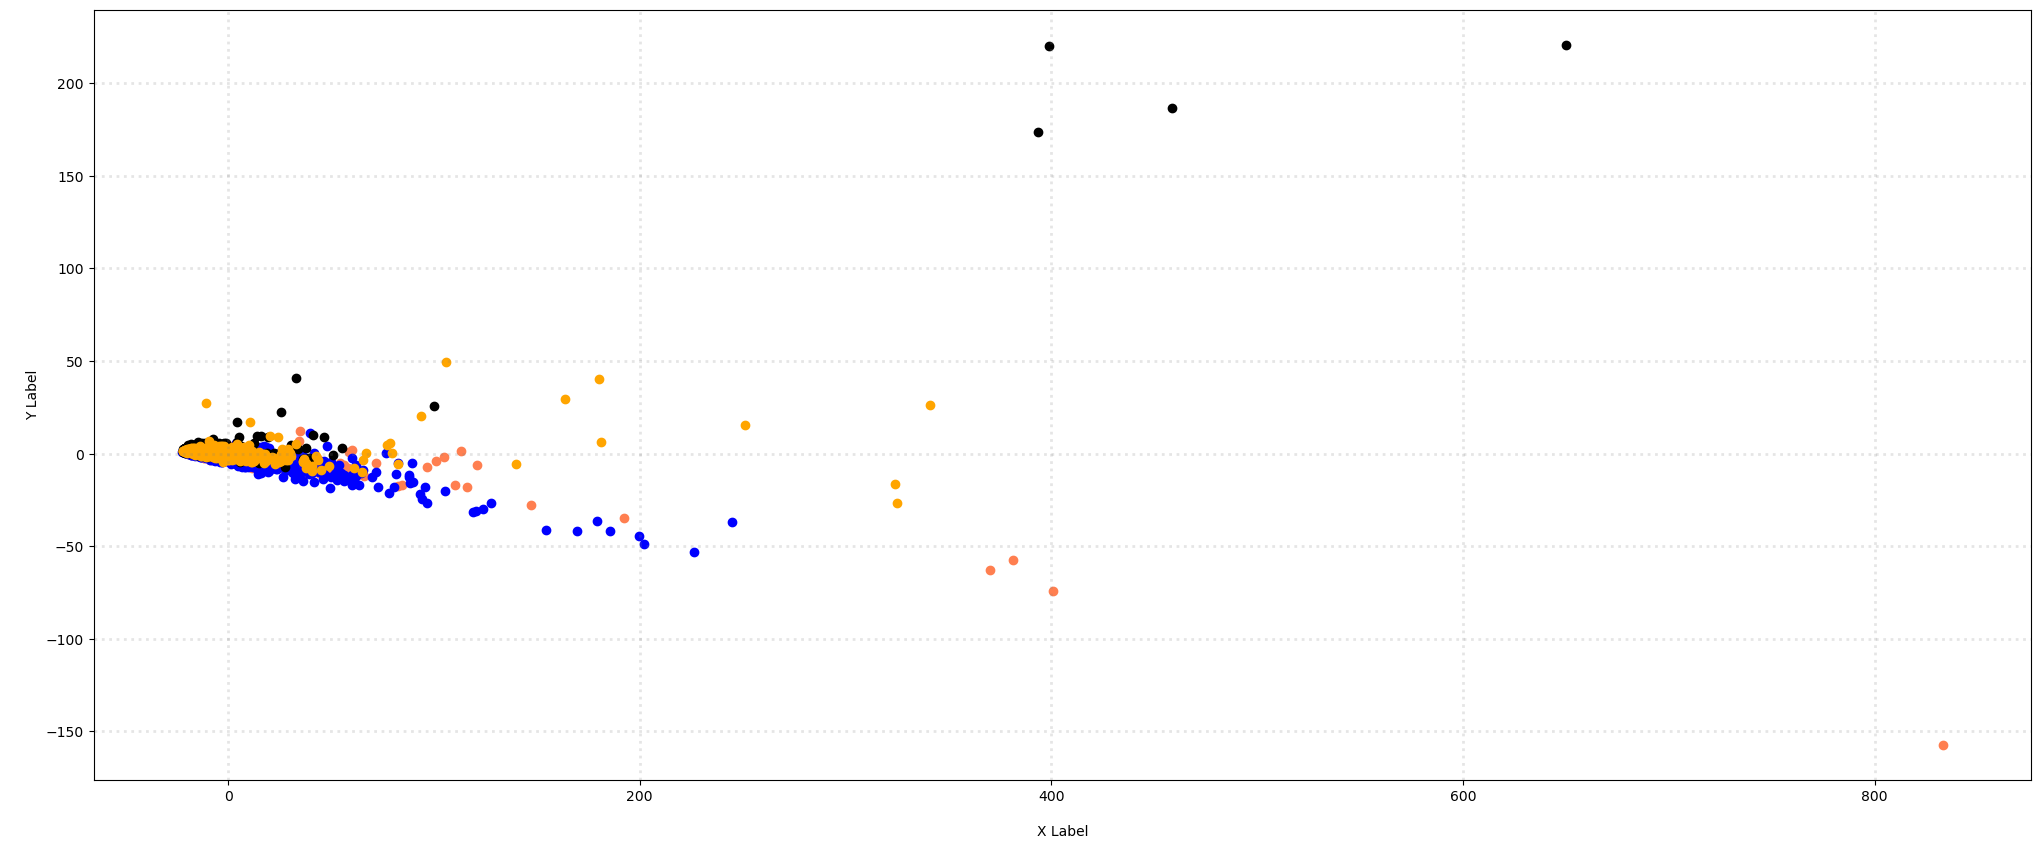

In [16]:
# here is the reference from 2D.
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Text(0.5, 0, '\nZ Label')

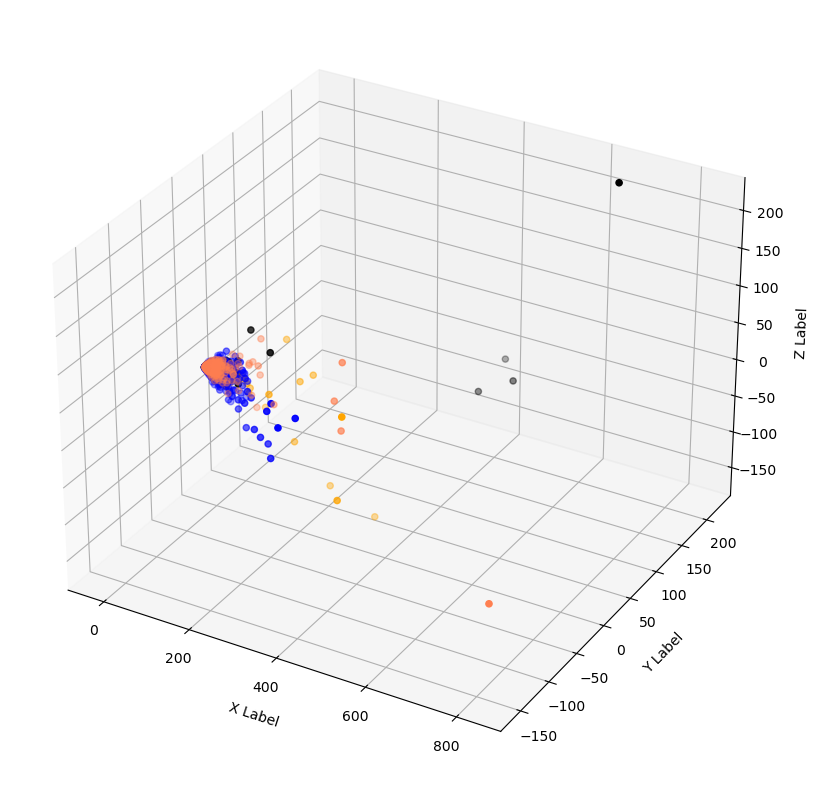

In [17]:
# here is the 3D
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plotting code reference from web
col = ['coral', 'blue', 'black', 'orange']

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111,projection='3d')

for c, category in zip(col, categories):
    x= X_reduced[X['category_name'] == category].T[0]
    y= X_reduced[X['category_name'] == category].T[1]
    z= X_reduced[X['category_name'] == category].T[2]
    ax.scatter(x, y, z, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

We should recognize that the 2D view is looked from top to bottom.
Some points looks very close in 2D, but in 3D, they are truly further than some points not so close in 2D.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

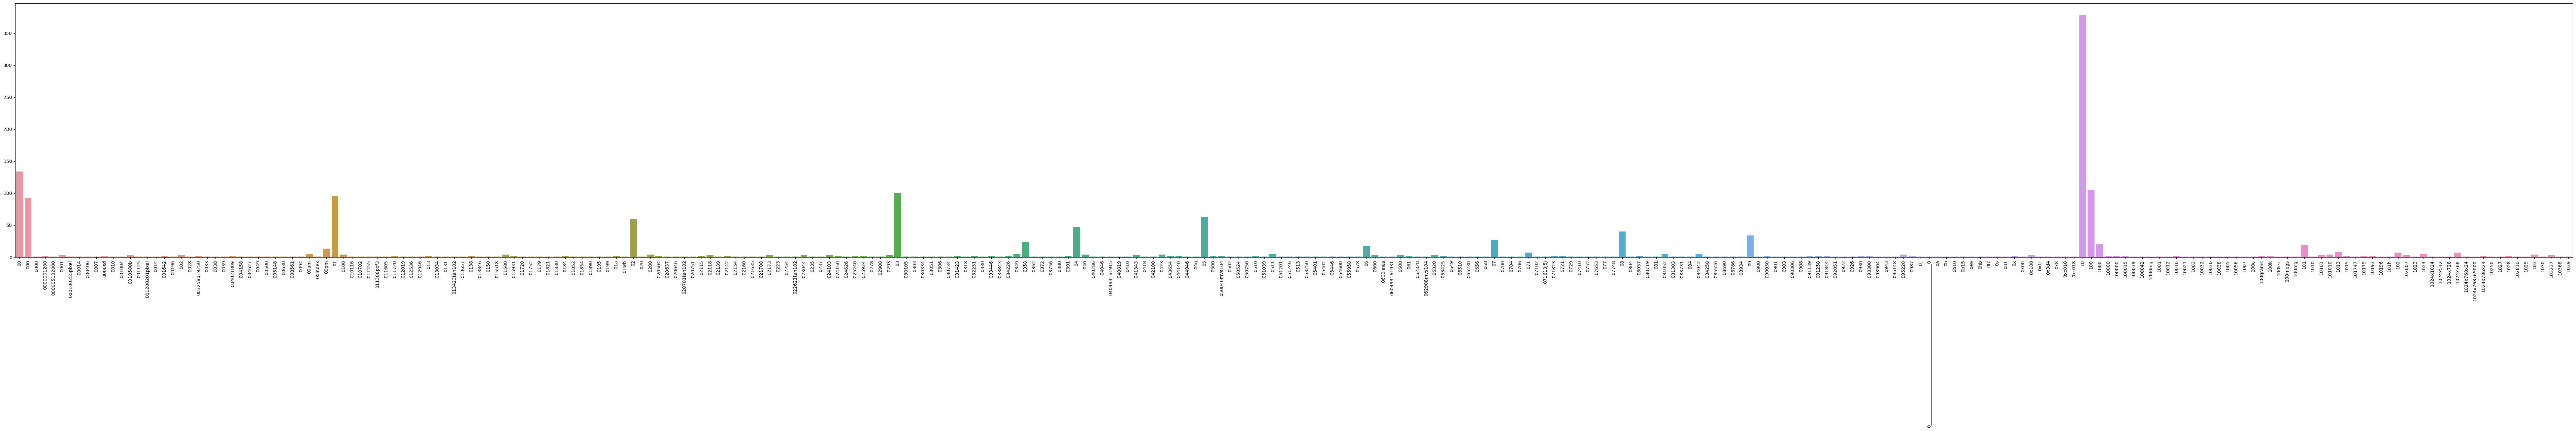

In [18]:
# It seems that just implement it, requires about 3 mins to create this plot
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

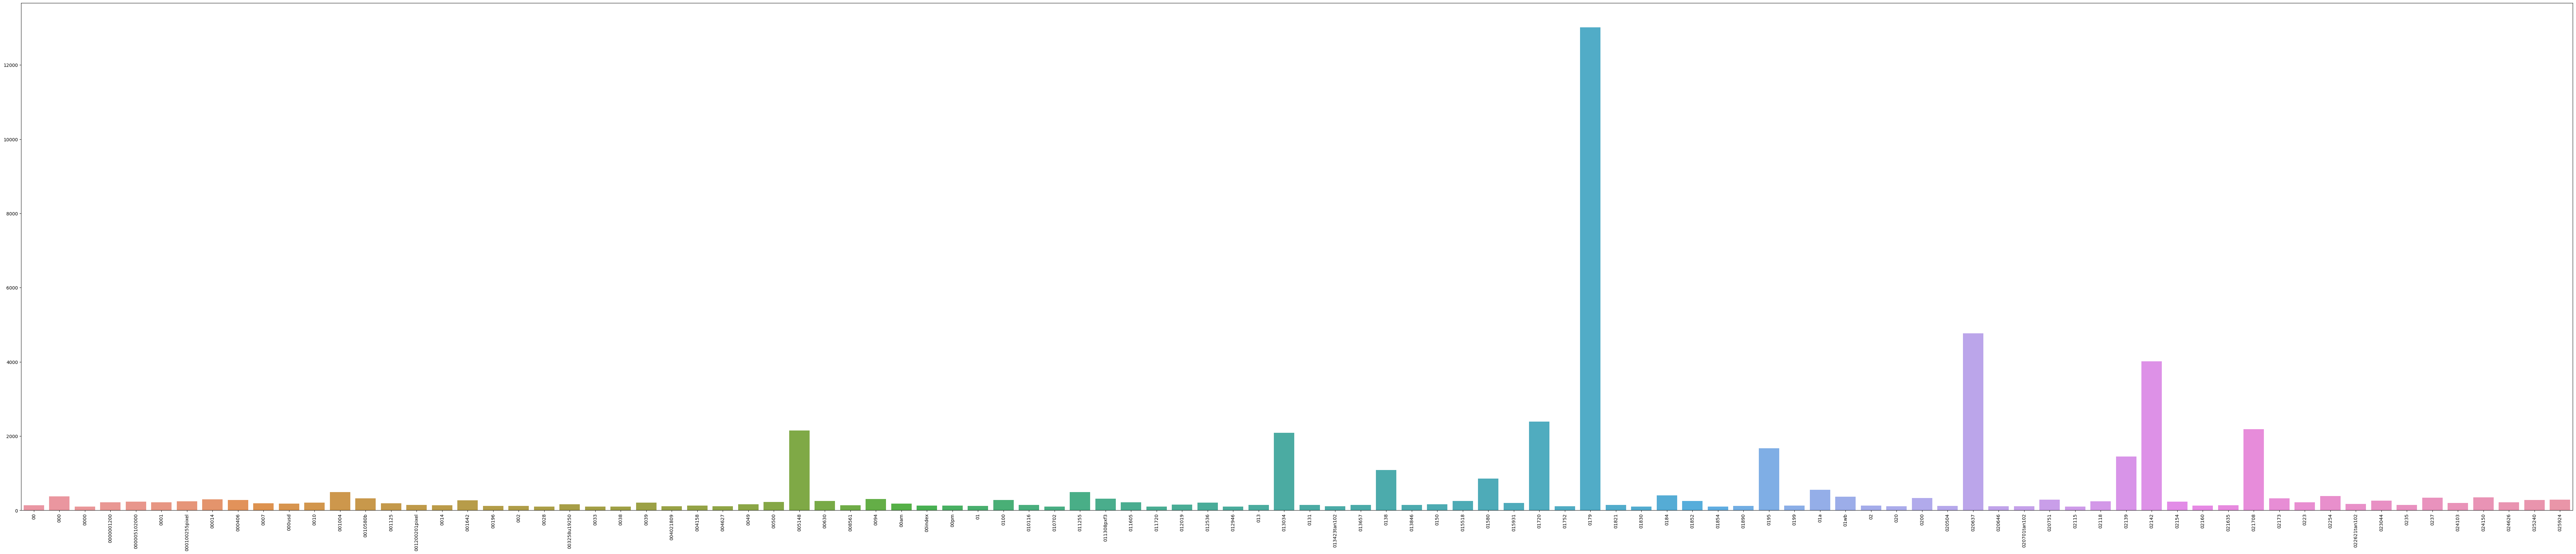

In [19]:
#consider from the above plot, I choose to del the fre. which is less than 100
term_frequencies_del=np.delete(term_frequencies, np.where(term_frequencies <= 100))

plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
            y=term_frequencies_del[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

<AxesSubplot:>

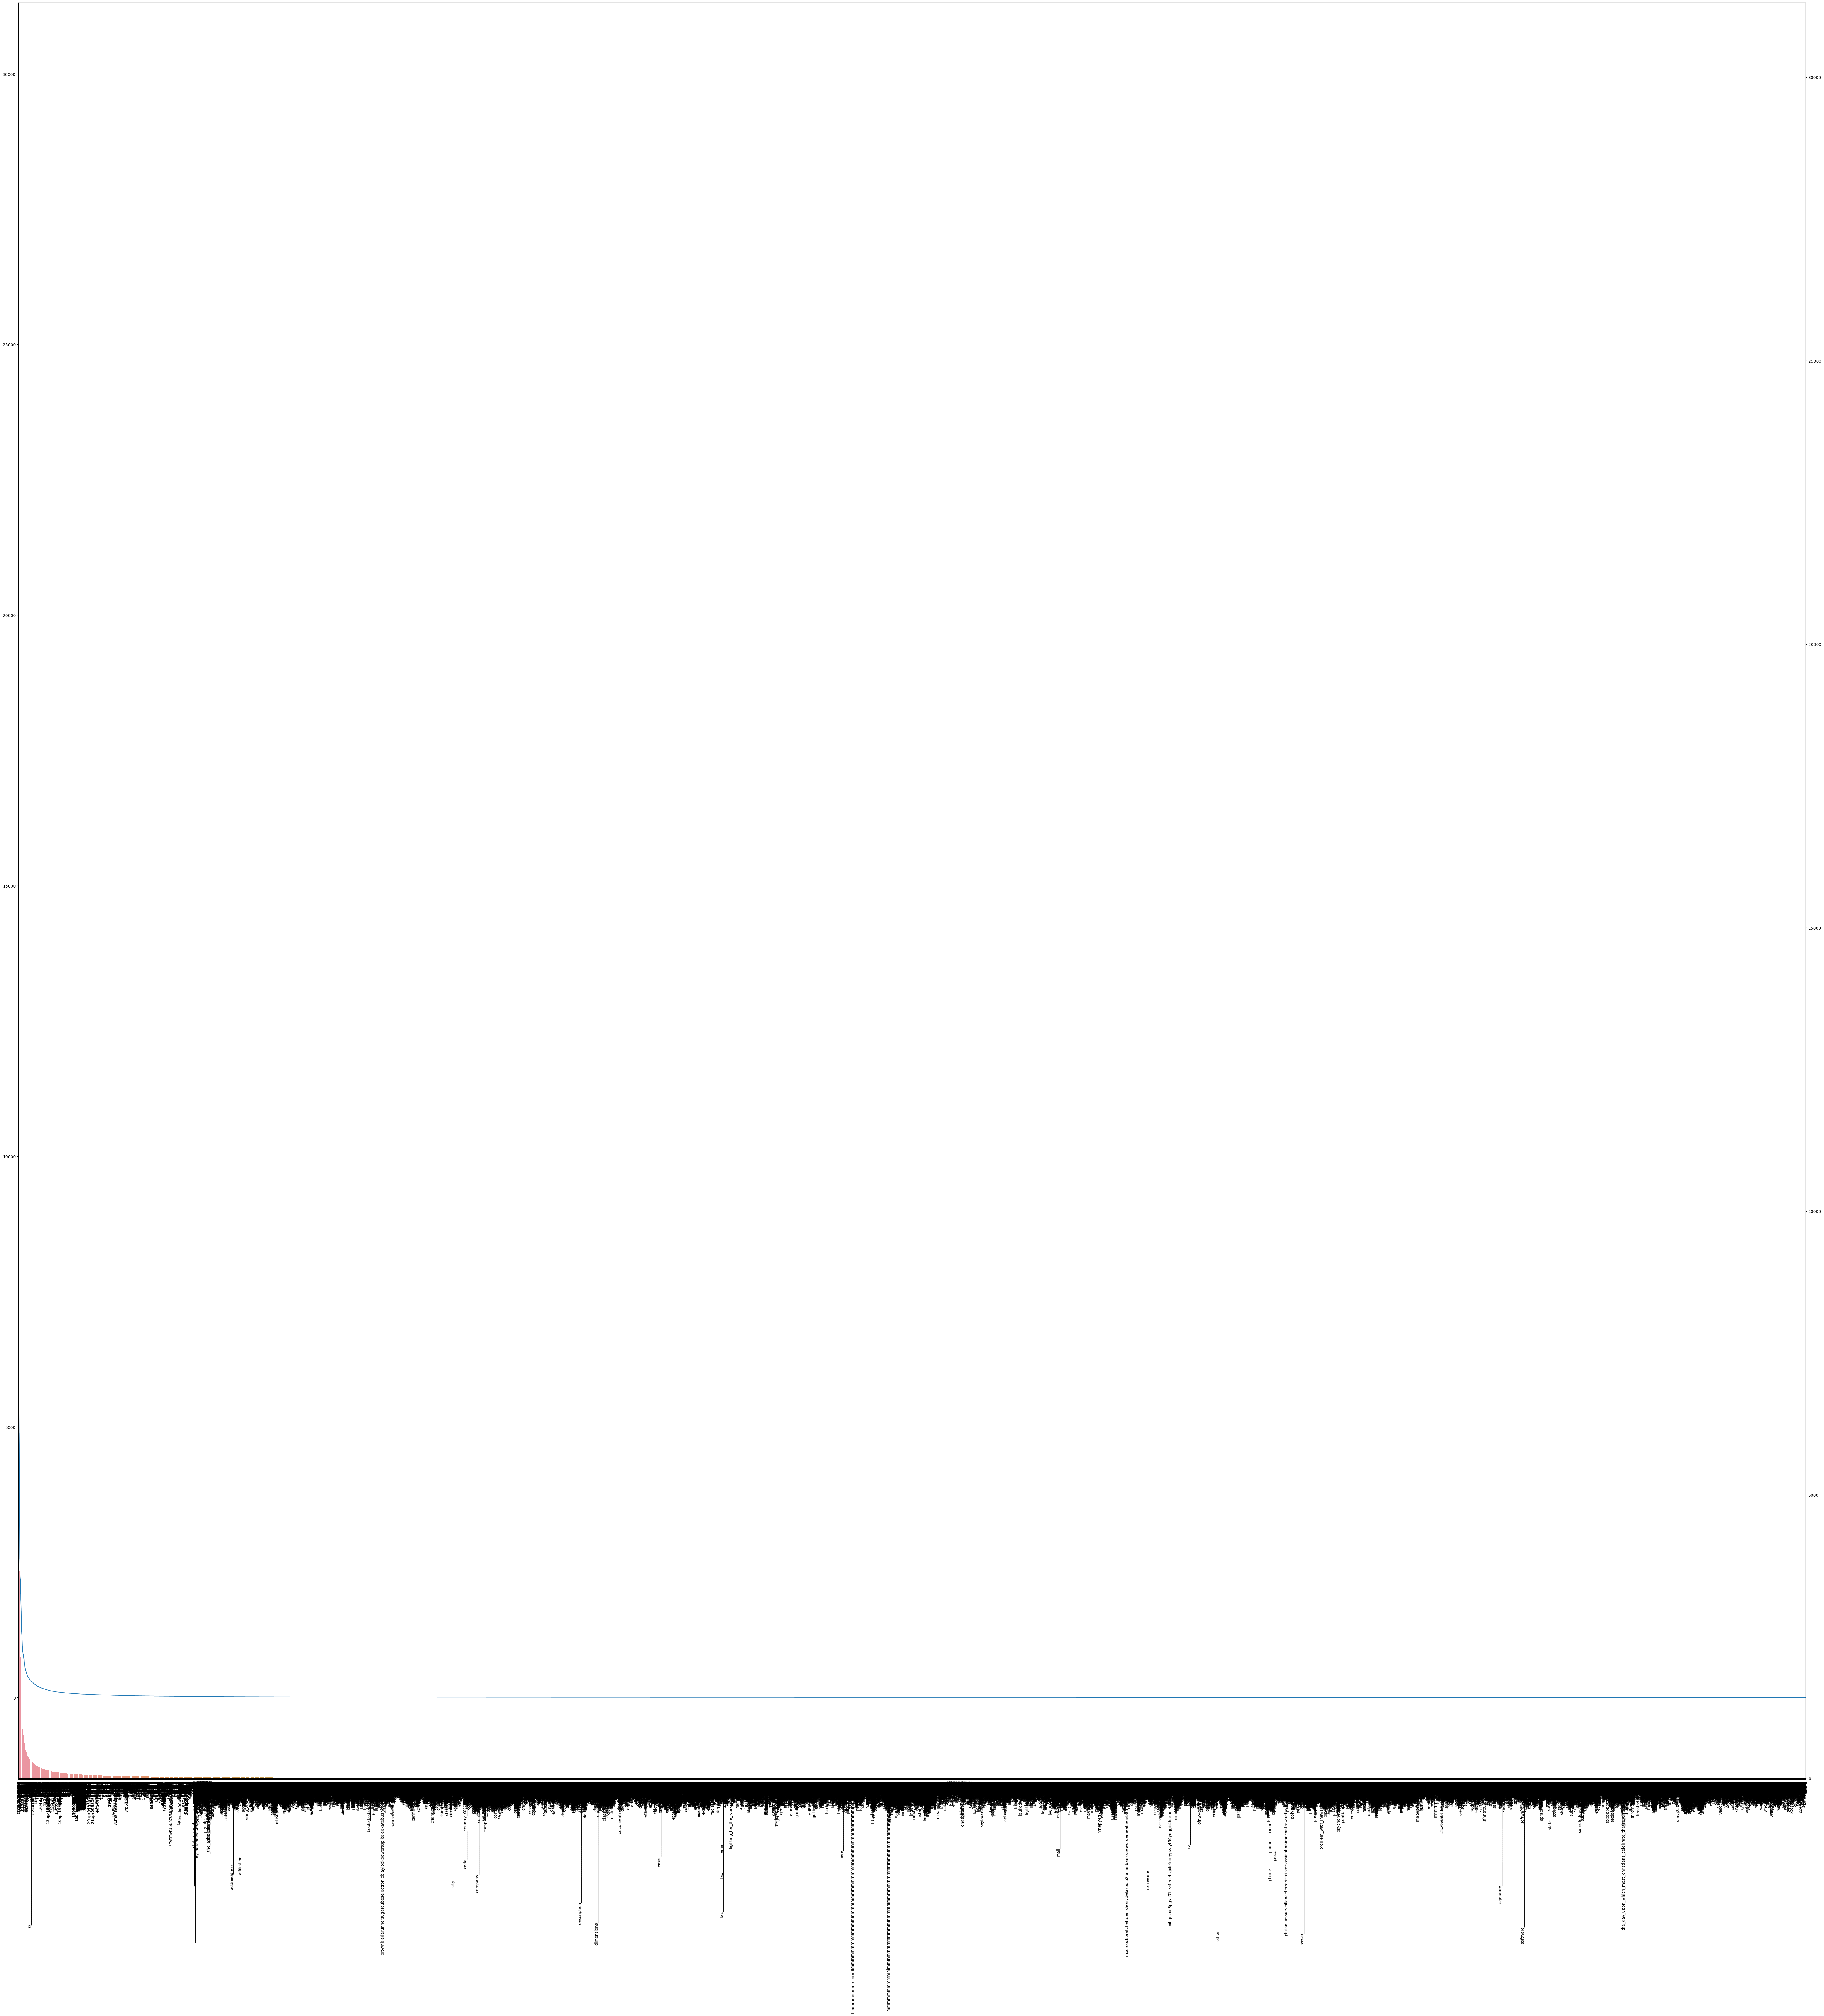

In [20]:
#It requires 9 mins to compile

y_axis = np.sort(term_frequencies)[::-1]

ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(80,80))

sns.lineplot(x=count_vect.get_feature_names_out(),y=y_axis)
plt.xticks(rotation=90)
ax2 = ax1.twinx()

sns.barplot(x=count_vect.get_feature_names_out(),y=y_axis, alpha=1.0)


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [21]:
# Of course, why not? They are all based on the same category, here is the demostration.
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 1, 0]"


# 2 